# Quick `nelpy` demo

Here we will look at a few quick ways to interact with `nelpy` obects.

Let's start with the required imports.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import nelpy as nel  # recommended import for nelpy
import nelpy.plotting as npl  # recommended import for the nelpy plotting library

%matplotlib inline

from nelpy.objects import SpikeTrain, SpikeTrainArray, BinnedSpikeTrain, BinnedSpikeTrainArray, EpochArray

In [6]:
epocharray[::-1].issorted


C:\Anaconda3\lib\site-packages\nelpy\objects.py:264: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
C:\Anaconda3\lib\site-packages\nelpy\objects.py:253: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


False

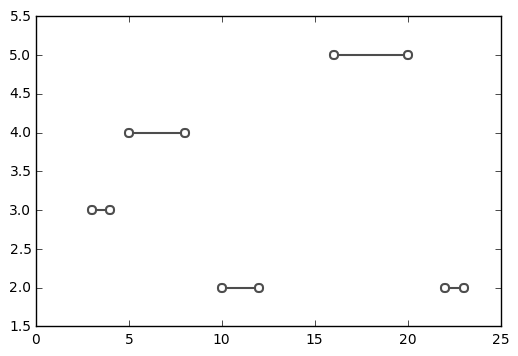

In [2]:
epocharray = EpochArray([[3,4],[5,8],[10,12], [16,20], [22,23]])
data = [3,4,2,5,2]

npl.plot(epocharray,data)


In [28]:
epocharray[40]

<empty EpochArray>

In [27]:
epocharray[1::2].time

C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:267: UserWarning: No sampling frequency has been specified!
  warnings.warn("No sampling frequency has been specified!")
C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:256: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


array([[ 5,  8],
       [16, 20]])

In [17]:
for epoch in epocharray:
    print(epoch)

<EpochArray: 1 epoch> totaling 1 seconds
<EpochArray: 1 epoch> totaling 3 seconds
<EpochArray: 1 epoch> totaling 2 seconds
<EpochArray: 1 epoch> totaling 4 seconds
<EpochArray: 1 epoch> totaling 1 seconds


In [29]:
# create some synthetic data

stdata = [5,12,14,15,16,18,23,25,32]  # spike times in sample numbers
st = SpikeTrain(stdata, fs=5)  # here we assume a sampling rate / frequency of 5 Hz

In [50]:
st = SpikeTrain(stdata, fs=3)
st.time

array([  1.66666667,   4.        ,   4.66666667,   5.        ,
         5.33333333,   6.        ,   7.66666667,   8.33333333,  10.66666667])

In [49]:
epocharray.time

array([[ 3,  4],
       [ 5,  8],
       [10, 12],
       [16, 20],
       [22, 23]])

In [52]:
st = SpikeTrain(stdata, fs=3, support=epocharray)

C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:1004: UserWarning: ignoring spikes outside of spiketrain support
  'ignoring spikes outside of spiketrain support')


In [53]:
nel.

array([  4.        ,   5.        ,   5.33333333,   6.        ,
         7.66666667,  10.66666667])

In [56]:
st.bin(ds=0.125)

<BinnedSpikeTrain: 88 bins of width 125.0 ms> for a total of 11.0 seconds.

In [48]:
st.fs = 5
st.time
st

<SpikeTrain[pyr]: 9 spikes at 5 Hz>

In [32]:
st.cell_type = 'pyr'

In [40]:
st.support

<EpochArray: 1 epoch> totaling 6.4 seconds

In [6]:
st[:3].support

C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:1127: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


<EpochArray: 1 epoch> totaling 1.8 seconds

In [7]:
st[40]

<empty SpikeTrain>

In [8]:
st[40].support

<empty EpochArray>

In [13]:
for spk in st:
    print(spk)

<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>
<SpikeTrain[pyr]: 1 spikes at 5 Hz>


C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:1127: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


In [9]:
st[::-1].time

C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:1127: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


array([ 6.4,  5. ,  4.6,  3.6,  3.2,  3. ,  2.8,  2.4,  1. ])

In [10]:
st[::3].time

C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:1127: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


array([ 1. ,  3. ,  4.6])

In [11]:
# create example spike times in samples
stdata = np.array([1, 2, 3, 4, 5, 6, 6.5, 7, 8, 10, 18, 18.5, 23, 25])
st = SpikeTrain(stdata, fs=10)

In [12]:
bst = BinnedSpikeTrain(st)

C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:1597: UserWarning: no bin size was given, assuming 62.5 ms
  warnings.warn('no bin size was given, assuming 62.5 ms')
C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:230: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


In [13]:
bst.n_active

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [14]:
print('The duration of st.support is {0:2.4} seconds.'.format(st.support.duration))
avgFiringRate = st.n_spikes / st.support.duration
print('Average firing rate: {0:2.4} Hz'.format(avgFiringRate))

The duration of st.support is 2.5 seconds.
Average firing rate: 5.6 Hz


In [15]:
bst.bins  # can be an EventArray to draw bin edges

array([ 0.    ,  0.0625,  0.125 ,  0.1875,  0.25  ,  0.3125,  0.375 ,
        0.4375,  0.5   ,  0.5625,  0.625 ,  0.6875,  0.75  ,  0.8125,
        0.875 ,  0.9375,  1.    ,  1.0625,  1.125 ,  1.1875,  1.25  ,
        1.3125,  1.375 ,  1.4375,  1.5   ,  1.5625,  1.625 ,  1.6875,
        1.75  ,  1.8125,  1.875 ,  1.9375,  2.    ,  2.0625,  2.125 ,
        2.1875,  2.25  ,  2.3125,  2.375 ,  2.4375,  2.5   ])

In [16]:
bst.centers

array([ 0.03125,  0.09375,  0.15625,  0.21875,  0.28125,  0.34375,
        0.40625,  0.46875,  0.53125,  0.59375,  0.65625,  0.71875,
        0.78125,  0.84375,  0.90625,  0.96875,  1.03125,  1.09375,
        1.15625,  1.21875,  1.28125,  1.34375,  1.40625,  1.46875,
        1.53125,  1.59375,  1.65625,  1.71875,  1.78125,  1.84375,
        1.90625,  1.96875,  2.03125,  2.09375,  2.15625,  2.21875,
        2.28125,  2.34375,  2.40625,  2.46875])

In [17]:
runEpoch = EpochArray(np.array([[0,3],[6,8], [24,25]]), fs=10)

st = SpikeTrain(stdata, fs=10, support=runEpoch)

C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:972: UserWarning: ignoring spikes outside of spiketrain support
  'ignoring spikes outside of spiketrain support')


In [18]:
st.support.time

array([[ 0. ,  0.3],
       [ 0.6,  0.8],
       [ 2.4,  2.5]])

In [20]:
st.support.durations

array([ 0.3,  0.2,  0.1])

In [21]:
stdata = np.array([1,2,3,4,5,6,6.5,7,8,10])
fs = 4
st = SpikeTrain(stdata, fs=fs)
st.cell_type = 'pyr'
ep1 = EpochArray([])
ep2 = EpochArray(np.array([[0,3],[7,10]]), fs=fs)
ep3 = EpochArray(np.array([[0,3],[8,15]]), fs=fs)
ep4 = EpochArray(np.array([[0,3],[17,20]]), fs=fs)
ep5 = EpochArray(np.array([[17,20]]), fs=fs)
ep6 = EpochArray(np.array([[-17,-10]]), fs=fs)
print('SpikeTrain')
print('==========')
print(st, st.support)
print('\nslicing with slice objects and integers')
print('==========')
print(st[:4], st[:4].support)
print(st[4:], st[4:].support)
print(st[4:50], st[4:50].support)
print(st[40:], st[40:].support)
print(st[-1], st[-1].support)
print(st[80], st[80].support)
print('\nslicing with EpochArrays')
print('==========')
print(st[ep1], st[ep1].support)
print(st[ep2], st[ep2].support)
print(st[ep3], st[ep3].support)
print(st[ep4], st[ep4].support)
print(st[ep5], st[ep5].support)
print(st[ep6], st[ep6].support)

SpikeTrain
<SpikeTrain[pyr]: 10 spikes at 4 Hz> <EpochArray: 1 epoch> totaling 2.5 seconds

slicing with slice objects and integers
<SpikeTrain[pyr]: 4 spikes at 4 Hz> <EpochArray: 1 epoch> totaling 0.75 seconds
<SpikeTrain[pyr]: 6 spikes at 4 Hz> <EpochArray: 1 epoch> totaling 1.25 seconds
<SpikeTrain[pyr]: 6 spikes at 4 Hz> <EpochArray: 1 epoch> totaling 1.25 seconds
<empty SpikeTrain> <empty EpochArray>
<SpikeTrain[pyr]: 1 spikes at 4 Hz> <EpochArray: 1 epoch> totaling 0.0 seconds
<empty SpikeTrain> <empty EpochArray>

slicing with EpochArrays
<empty SpikeTrain> <empty EpochArray>
<SpikeTrain[pyr]: 6 spikes at 4 Hz> <EpochArray: 2 epochs> totaling 1.5 seconds
<SpikeTrain[pyr]: 5 spikes at 4 Hz> <EpochArray: 2 epochs> totaling 1.25 seconds
<SpikeTrain[pyr]: 3 spikes at 4 Hz> <EpochArray: 1 epoch> totaling 0.75 seconds
<empty SpikeTrain> <empty EpochArray>
<empty SpikeTrain> <empty EpochArray>


C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:1127: UserWarning: meta data is not available
  warnings.warn("meta data is not available")
C:\Users\etien\Anaconda3\lib\site-packages\nelpy\objects.py:230: UserWarning: meta data is not available
  warnings.warn("meta data is not available")


In [ ]:
stdata1 = [1,2,4,5,6,10,20]
stdata2 = [3,4,4.5,5,5.5,19]
stdata3 = [5,12,14,15,16,18,22,23,24]
stdata4 = [5,12,14,15,16,18,23,25,32]

ep1 = nel.EpochArray([[0.8, 2.8], [4.5,5]], fs=1)
# ep1 = EpochArray([[0.8, 2.8]], fs=1)

sta1 = nel.SpikeTrainArray([stdata1, stdata2, stdata3, stdata4, stdata1+stdata4], fs=5)
sta2 = nel.SpikeTrainArray([stdata1, stdata2, stdata3, stdata4, stdata1+stdata4], support=ep1, fs=5)

npl.plot(sta1, cmap=plt.cm.Blues, lw=3)
npl.plot(sta2, cmap=plt.cm.gray, lw=3)
npl.plot(sta2.support)